#install all the necessary libraries 
pip install pandas numpy matplotlib seaborn openpyxl

In [4]:
pip install pandas

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install WordCloud

  Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#import the installed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date, timedelta
from wordcloud import WordCloud

In [3]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# load the dataset and print the first few rows using head

In [2]:
df = pd.read_excel("Exam Stress Final.xlsx")

In [3]:
print(df.head())

  Student_id  Midterm 1  Midterm 2  final
0        S01         78         82    182
1        S02         82         85    180
2        S03         77         90    188
3        S04         75         77    149
4        S05         67         77    157


# loading dataset and then to view specific sheet of the excel

In [8]:
df_ibi = pd.read_excel("Exam Stress Final.xlsx", sheet_name="IBI")
print(df_ibi.head())

   Time in mins    IBI Student_id   Exam
0             0  0.446        S01  final
1             1  0.473        S01  final
2             3  0.444        S01  final
3             4  0.496        S01  final
4             8  0.448        S01  final


# to get the column details

In [5]:
print(df_ibi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time in mins  3315 non-null   int64  
 1   IBI           3315 non-null   float64
 2   Student_id    3315 non-null   object 
 3   Exam          3315 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 103.7+ KB
None


# To get the basic stats

In [6]:
print(df_ibi.describe())

       Time in mins          IBI
count   3315.000000  3315.000000
mean     101.056712     0.608875
std       59.884926     0.157723
min        0.000000     0.313000
25%       53.500000     0.492000
50%       97.000000     0.594000
75%      144.000000     0.721500
max      390.000000     1.531000


# To check for missing values

In [7]:
print(df_ibi.isnull().sum())

Time in mins    0
IBI             0
Student_id      0
Exam            0
dtype: int64


In [12]:
import warnings
warnings.filterwarnings('ignore')

#To calculate RMSSD 
1.import numpy - mathematical operations
2.creating a function
3.we need to calculate the differences between consecutive IBI values
4.we need to square the differences
5.find the mean and square root 
6.we are grouping student ID and exam to calculate RMSSD separately for each student in each exam
7.rolling window of 30 takes time into account
8.if we dont put min_periods = 2, the first value will be considered 0 which is wrong. we atleast need 2 values to calculate RMSSD.
9.apply function applies the RMSSD function to 30 minute window and reset function removes extra index columnd created by groupby


## Q1: Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI


In [9]:
import numpy as np

def calculate_rmssd(ibi_series):
    differences = np.diff(ibi_series)
    squared_diffs = differences ** 2
    return np.sqrt(np.mean(squared_diffs))

df_ibi["RMSSD"] = df_ibi.groupby(["Student_id", "Exam"])["IBI"].rolling(
    window=30, min_periods=2).apply(calculate_rmssd, raw=True).reset_index(level=[0,1], drop=True)

df_ibi.head()

,Time in mins,IBI,Student_id,Exam,RMSSD
0,0,0.446,S01,final,NaN
1,1,0.473,S01,final,0.027000
2,3,0.444,S01,final,0.028018
3,4,0.496,S01,final,0.037745
4,8,0.448,S01,final,0.040552


In [9]:
df_ibi.to_excel("Processed_IBI.xlsx", index=False)

First we need to calculate min and max. eg: min = 1, max = 9
Then, we need to calculate the intervals. eg: (9-1)/3 = 2.67
Then, we need to calculate the boundaries. eg: first part = 1 + 2.67 = 3.67, second part = 3.67 + 2.67 = 6.34
Based on this value, we can categorize. All values below 3.67 are first, values below 6.34 are second and values above 6.34 are third

## 2. Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam

In [5]:
import pandas as pd
import numpy as np
# Load the EDA sheet
df_eda = pd.read_excel("Exam Stress Final.xlsx", sheet_name="EDA")
print(df_eda.head())

     EDA  Time in mins Student_id   Exam
0  0.040             1        S01  final
1  0.024             2        S01  final
2  0.024             3        S01  final
3  0.024             4        S01  final
4  0.024             5        S01  final


In [7]:
# Function to categorize time into three parts for each exam
def categorize_time(df):
    df = df.copy()
    min_time = df["Time in mins"].min()
    max_time = df["Time in mins"].max()
    interval = (max_time - min_time) / 3

    # Define time boundaries
    first_part = min_time + interval
    second_part = first_part + interval

    # Assign categories based on time intervals
    df["Time Category"] = df["Time in mins"].apply(
        lambda x: "First" if x <= first_part else ("Second" if x <= second_part else "Third")
    )
    return df

# Apply categorization to each exam separately
eda_df_grouped = df_eda.groupby("Exam", group_keys=False).apply(categorize_time)

# Display the updated DataFrame with the new column
eda_df_grouped.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6060\2245008299.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eda_df_grouped = df_eda.groupby("Exam", group_keys=False).apply(categorize_time)


,EDA,Time in mins,Student_id,Exam,Time Category
0,0.040,1,S01,final,First
1,0.024,2,S01,final,First
2,0.024,3,S01,final,First
3,0.024,4,S01,final,First
4,0.024,5,S01,final,First


In [8]:
second_part_df = eda_df_grouped[eda_df_grouped["Time Category"] == "Second"]
print(second_part_df)

        EDA  Time in mins Student_id       Exam Time Category
144   0.202           145        S01      final        Second
145   0.199           146        S01      final        Second
146   0.201           147        S01      final        Second
147   0.199           148        S01      final        Second
148   0.203           149        S01      final        Second
...     ...           ...        ...        ...           ...
7310  0.020           153       S010  midterm 2        Second
7311  0.020           154       S010  midterm 2        Second
7312  0.020           155       S010  midterm 2        Second
7313  0.020           156       S010  midterm 2        Second
7314  0.020           157       S010  midterm 2        Second

[2804 rows x 5 columns]


## 3. Based on the calculation in question 2, which part of the exam did students suffer maximum stress? You may assume that higher recorded skin conductance co-incides with high levels of stress

In [14]:
pip install scipy

     ---------------------------------------- 43.9/43.9 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analyze_stress_levels(df):
    """
    Analyzes EDA (stress) levels across different exam periods
    
    Parameters:
    df (pandas.DataFrame): DataFrame with 'EDA', 'Time_Period', 'Student_id', and 'Exam' columns
    
    Returns:
    tuple: (DataFrame with summary statistics, DataFrame with statistical test results)
    """
    # Calculate summary statistics for each period
    summary_stats = df.groupby('Time_Period')['EDA'].agg([
        'mean',
        'median',
        'std',
        'count'
    ]).round(2)
    
    # Perform one-way ANOVA to test if differences are significant
    first_group = df[df['Time_Period'] == 'First']['EDA']
    second_group = df[df['Time_Period'] == 'Second']['EDA']
    third_group = df[df['Time_Period'] == 'Third']['EDA']
    
    f_stat, p_value = stats.f_oneway(first_group, second_group, third_group)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Time_Period', y='EDA', data=df)
    plt.title('Distribution of Stress Levels (EDA) Across Exam Periods')
    plt.xlabel('Exam Period')
    plt.ylabel('EDA (Stress Level)')
    plt.show()
    
    # Perform pairwise t-tests
    pairs = [('First', 'Second'), ('Second', 'Third'), ('First', 'Third')]
    t_test_results = []
    
    for period1, period2 in pairs:
        t_stat, p_val = stats.ttest_ind(
            df[df['Time_Period'] == period1]['EDA'],
            df[df['Time_Period'] == period2]['EDA']
        )
        t_test_results.append({
            'Comparison': f'{period1} vs {period2}',
            't_statistic': round(t_stat, 3),
            'p_value': round(p_val, 4)
        })
    
    t_test_df = pd.DataFrame(t_test_results)
    
    return summary_stats, t_test_df

# Example usage:
# result_df = group_exam_periods(eda_df)  # Using function from previous question
# summary_stats, t_test_results = analyze_stress_levels(result_df)
# print("\nSummary Statistics:")
# print(summary_stats)
# print("\nPairwise T-Test Results:")
# print(t_test_results)

## 4. Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student. 

### A higher HRV indicates greater adaptability and health, while a lower HRV is associated with stress, fatigue, and even burnout. We need to calculate the Standard Deviation of HRV and compare with all HRV values to reach at lower HRVs. Students with these lower HRVs have higher stress.

In [10]:
# Calculate HRV for each student per exam (using RMSSD values)
# We will use RMSSD as the HRV
df_ibi["HRV"] = df_ibi["RMSSD"]

# Calculate standard deviation of HRV for each student across exams
std_hrv = df_ibi.groupby("Student_id")["HRV"].std()

# Compare HRV with standard deviation to identify lower HRVs (higher stress)
lower_hrv_threshold = std_hrv.mean() - std_hrv.std()  # Set a threshold for lower HRVs
students_with_lower_hrv = std_hrv[std_hrv < lower_hrv_threshold].index.tolist()

# Print the students with lower HRVs (higher stress)
print(f"Students with lower HRVs (higher stress): {students_with_lower_hrv}")

Students with lower HRVs (higher stress): ['S08']


## 5. Join all tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp

In [11]:
import pandas as pd

# Load all sheets from the Excel file
file_path = "Exam Stress Final.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

In [12]:
# Merge all relevant sheets on 'Time' or a common column
df_merged = sheets_dict['EDA'].merge(sheets_dict['IBI'], on="Time in mins").merge(
    sheets_dict['HR'], on="Time in mins").merge(
    sheets_dict['Temp'], on="Time in mins")

MergeError: Passing 'suffixes' which cause duplicate columns {'Student_id_x', 'Exam_x'} is not allowed.

## 6. Calculate the age and Display Age and drop the Date of Birth with  iteratively.  (Replace DOB for other questions when complete)

## 7. Using numpy functions, transpose and multiply the following arrays
#### a=np.arange(4).reshape(2,2)
#### b=np.arange(6).reshape(3,2) 

Transposing is necessary to match the number of columns of the first array to the number of rows of the second array. Without transposing in this case, number of columns of first (2) does not match the number of rows (3) in the second. That is why, we are transposing first. After transposing, (2) of first is equal to (2) of second. 

In [5]:
import numpy as np

# Define the first array a with values from 0 to 3, reshaped into a 2x2 matrix
a = np.arange(4).reshape(2, 2)

# Define the second array b with values from 0 to 5, reshaped into a 3x2 matrix
b = np.arange(6).reshape(3, 2)

# Transpose matrix b to make it compatible for matrix multiplication
b_T = b.T  # Now b_T is a 2x3 matrix

# Perform matrix multiplication between a (2x2) and b_T (2x3)
result = np.dot(a, b_T)

# Display the result
print(result)


[[ 1  3  5]
 [ 3 13 23]]


## 8. Write a Python program to create an array of 5 integers and display the array items in reverse order

Slicing is used to reverse the array. The slicing notation in python is arr[start:stop:step]. start is the index where slicing begin (default is first element), stop is index where slicing stops (default is last element) and step is the interval between elements (default is 1). ::1 means select elements from start to end, one stop at a time (10 20 30 40 50). ::2 means select every second elemet (10 30 50). 

In [6]:
import numpy as np  # Import the NumPy library

# Create a NumPy array with 5 integers
arr = np.array([10, 20, 30, 40, 50])

# Reverse the array using slicing
reversed_arr = arr[::-1]

# Print the reversed array
print("Reversed Array:", reversed_arr)

Reversed Array: [50 40 30 20 10]


## 9. What was the average grade for all students in the final exam vs both midterms

We are using axis=1 because we need to calculate the average of midterm 1 and 2 of each student. So we need to calculate the values of each row. If we dont give anything or if we give axis=0, then it will calculate the average of the columns which is not required here. 

In [7]:
# Calculate the average grade for the final exam
avg_final = df["final"].mean()

# Calculate the average of both midterms
avg_midterms = df[["Midterm 1", "Midterm 2"]].mean(axis=1).mean()

print("Average Final Exam Score:", avg_final)
print("Average Midterms Score:", avg_midterms)

Average Final Exam Score: 156.7
Average Midterms Score: 73.7


## 10. Which students basal body temperature was highest during the second part of the exam?

## 11. What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females? 

First we are creating a dataframe called grades to get the final grades and a dataframe called demography to get the gender. We are doing this because grades is in one sheet and then gender is in another sheet. Then we are merging both of them on student_id which is common for both sheets. We are then getting the top 3 grades. From the top 3 grades, we are getting the value counts of the gender column. Without normalization, we will get the raw absolute count like M 3 and F 2. If we use normalize function, we will get the proportion or percentage of each category, so in this case M 0.6 and F 0.4. We then multiply this by 100 to get the percentage. The purpose of normalizing is to convert raw counts into percentages to easily understand the proportion of males vs females. 

In [11]:
import pandas as pd

# Load the data from both sheets
grades_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Grades")
demography_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Demography")

# Merge both sheets on "Student_id"
df = pd.merge(grades_df, demography_df, on="Student_id")

# Get the top 3 highest grades in the final exam
top_3_grades = df.nlargest(3, "final")

# Count the percentage of males vs. females in the top 3
gender_counts = top_3_grades["Gender"].value_counts(normalize=True) * 100

# Display results
print("Top 3 grades in the final exam:")
print(top_3_grades[["Student_id", "First Name", "Last Name", "final"]])

print("\nPercentage of top 3 grades by gender:")
print(gender_counts)


Top 3 grades in the final exam:
  Student_id First Name Last Name  final
2        S03    Gabriel   Willows    188
7        S08       John     Wills    184
0        S01    Barbara   Walters    182

Percentage of top 3 grades by gender:
Gender
F    66.666667
M    33.333333
Name: proportion, dtype: float64


## 12. phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Joe

## 13. How many minutes did the midterm 2 last( on average) for all 10 students

In [4]:
EDA_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="EDA")
# Filter the data for midterm 2
midterm_2_df = EDA_df[EDA_df['Exam'] == 'midterm 2']

# Calculate the average time in minutes
average_time_midterm_2 = midterm_2_df['Time in mins'].mean()

print("The average duration of midterm 2 is:", average_time_midterm_2, "minutes.")

The average duration of midterm 2 is: 102.62810327706057 minutes.


## 14. Analyze the trend of body temp at the start of the exam. Were body temperatures higher or lower in the first part of the exam. What is the overall trend?

we first calculate the maximum time in minutes in order to split the time. Then we split the time, with early having temp less than or equal to 1/3rd of the max time, middle having temp greater than 1/3 and less than or equal to 2/3, late having temp greater than 2/3. After this, we calculate the average time for each and print the results. We analyse the trend next saying if early is higher than middle and middle is higher than late, then body temp decreases, if its the opposite then the body temp increases. 

In [5]:
# Load the data
Temp_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Temp")

# Define the segments
exam_duration_max = Temp_df['Time in mins'].max()

early_exam_df = Temp_df[Temp_df['Time in mins'] <= exam_duration_max / 3]
middle_exam_df = Temp_df[(Temp_df['Time in mins'] > exam_duration_max / 3) & (Temp_df['Time in mins'] <= 2 * exam_duration_max / 3)]
late_exam_df = Temp_df[Temp_df['Time in mins'] > 2 * exam_duration_max / 3]

# Calculate average body temperatures for each segment
average_temp_early = early_exam_df['TEMP'].mean()
average_temp_middle = middle_exam_df['TEMP'].mean()
average_temp_late = late_exam_df['TEMP'].mean()

# Print out the results
print(f"Average body temperature in the early part of the exam (0–66 mins): {average_temp_early}")
print(f"Average body temperature in the middle part of the exam (67–133 mins): {average_temp_middle}")
print(f"Average body temperature in the late part of the exam (134–200 mins): {average_temp_late}")

# Analyze the overall trend
if average_temp_early > average_temp_middle and average_temp_middle > average_temp_late:
    print("Overall trend: Body temperatures decrease as the exam progresses.")
elif average_temp_early < average_temp_middle and average_temp_middle < average_temp_late:
    print("Overall trend: Body temperatures increase as the exam progresses.")
else:
    print("Overall trend: Body temperatures fluctuate during the exam.")

Average body temperature in the early part of the exam (0–66 mins): 28.629416083916084
Average body temperature in the middle part of the exam (67–133 mins): 25.934906890894176
Average body temperature in the late part of the exam (134–200 mins): 23.10197678018576
Overall trend: Body temperatures decrease as the exam progresses.


## 15.What % of all students had a HR>80 and an HRV<30 in the second part of the finals?

## 16. What was the % difference between scores in both mid-terms vs the final

In [11]:
# Load the Grades data
grades_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Grades")

# Calculate the average scores for midterms and final
avg_midterms = (grades_df["Midterm 1"].mean() + grades_df["Midterm 2"].mean()) / 2
avg_final = grades_df["final"].mean()

# Calculate the percentage difference between midterms and final scores
percentage_difference = ((avg_final - avg_midterms) / avg_midterms) * 100

# Print the result
print(f"The percentage difference between the average of both midterms and the final exam is {percentage_difference:.2f}%.")

The percentage difference between the average of both midterms and the final exam is 112.62%.


## 17. What % of all students are Asian?

In [13]:
# Load the demography data
demography_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Demography")

# Count the number of Asian students
asian_students = demography_df[demography_df["Race"] == "Asian"]["Student_id"].nunique()

# Calculate the total number of students
total_students = demography_df["Student_id"].nunique()

# Calculate the percentage of Asian students
percentage_asian = (asian_students / total_students) * 100

# Print the result
print(f"{percentage_asian:.2f}% of all students are Asian.")

20.00% of all students are Asian.


## 18. Display the full name of all students born in 2010

In [14]:
# Load the demography data
demography_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Demography")

# Convert DOB to datetime format
demography_df["DOB"] = pd.to_datetime(demography_df["DOB"], errors='coerce')

# Filter students born in 2010
students_2010 = demography_df[demography_df["DOB"].dt.year == 2010]

# Display full names
students_2010["Full Name"] = students_2010["First Name"] + " " + students_2010["Last Name"]

# Print the full names
print(students_2010[["Full Name"]])

         Full Name
6  Roger Frederick


C:\Users\HP\AppData\Local\Temp\ipykernel_33564\2892767866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_2010["Full Name"] = students_2010["First Name"] + " " + students_2010["Last Name"]


## 19. What was the average HR of the students who achieved the top 3 grades in mid-term 2

In [16]:
# Load the Grades and HR data
grades_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Grades")
HR_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="HR")

# Find the top 3 highest grades in Midterm 2
top_3_scores = grades_df.nlargest(3, "Midterm 2")

# Filter HR data for students who achieved these top 3 grades
top_students_HR = HR_df[HR_df["Student_id"].isin(top_3_scores["Student_id"])]

# Calculate the average HR for these students
average_HR = top_students_HR["HR"].mean()

# Print the result
print(f"The average HR of the students who achieved the top 3 grades in Midterm 2 is {average_HR:.2f}.")

The average HR of the students who achieved the top 3 grades in Midterm 2 is 107.99.


## 20. Use a bar chart to display the grades of every student in mid term 1

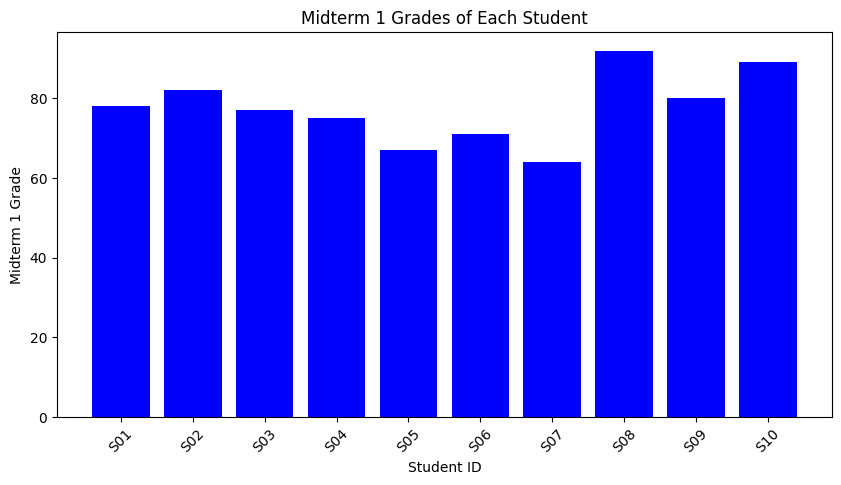

In [17]:
# Load the Grades data
grades_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Grades")

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(grades_df["Student_id"], grades_df["Midterm 1"], color='blue')

# Add labels and title
plt.xlabel("Student ID")
plt.ylabel("Midterm 1 Grade")
plt.title("Midterm 1 Grades of Each Student")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

## 21.What % of all students are female?

In [15]:
# Load the demography data
demography_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Demography")

# Count the number of female students
female_students = demography_df[demography_df["Gender"] == "F"]["Student_id"].nunique()

# Calculate the total number of students
total_students = demography_df["Student_id"].nunique()

# Calculate the percentage of Asian students
percentage_female = (female_students / total_students) * 100

# Print the result
print(f"{percentage_female:.2f}% of all students are Female.")

50.00% of all students are Female.


## 22.Show the students for whom temperature fell below basal body temp of 36 degrees

## 23. Connect to sql and query the data in temp into a table of the same name

## 24. Display a sunburst chart of count of students by Age, Gender and Race

In [22]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install --upgrade ipython

     -------------------------------------- 825.5/825.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 8.22.2
    Uninstalling ipython-8.22.2:
      Successfully uninstalled ipython-8.22.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import plotly.io as pio
pio.renderers.default = "browser"
fig.show()

In [25]:
import pandas as pd
import plotly.express as px
from datetime import datetime

# Load the Demography data
demography_df = pd.read_excel("Exam Stress Final.xlsx", sheet_name="Demography")

# Convert DOB to datetime format and calculate Age
demography_df["DOB"] = pd.to_datetime(demography_df["DOB"], errors='coerce')
demography_df["Age"] = datetime.now().year - demography_df["DOB"].dt.year

# Create the Sunburst chart
fig = px.sunburst(demography_df, path=["Age", "Gender", "Race"], title="Count of Students by Age, Gender, and Race")

# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 25. Create a visualization on the count of Students with an HRV 10 or more points lower than ideal HRV.

## 26. Plot a graph to show the distribution of score in the final exam by gender

## 27. Which demographic has the lowest average of scores in all 3 exams

## 28. Delete the column age from question 12, using an iterative loop

## 29. Create a heat map of HRV, temp and scores. To show the correlation beween these variables

## 30. Use the dataset given and Enumerate in Python with any example.

## 31. Create a jointplot on EDA & Grades

## 32. Use indexing , loc to retrieve the row with maximum HR

## 33. Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows

## 34. Display the Student Demographics and Grades who are born in leap Year

## 35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'

## 36.Create a Word Cloud with First name of Student Names based on the Race 

## 37.Display the student Names and respective grades who has Maximum heart rate

## 38. Write a Python program to get the number of occurrences of a specified element in the array.

## 39. Create a 3D list using nested for loops

## 40.Display each row of this array as a separate slice

## 41. Find the Student name and the Exam who has the Temperature '36.042'

## 42. Using arrays and loops, find the count of students based on gender

## 43. Generate Unique Student ID  using Lamda Function

## 44. Create a Box  plot for HR and Temp

## 45. Find the student's Max mean EDA who are attending Final 

## 46. Find the Grade of a Student whose Name ends with 'S'

## 47. Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)

## 48. Find the Full Name of the student who has Max HR

## 50. Count the Students who are in the Race Group 'White'

## 51. Display the Youngest Student demographic details. with Avg Heart Rate

## 52. Plot the Donut chart Student distrubution by Gender

## 53. Calculate the 'AGE' of the Student and Display with Student Name 

## 55. Display the mean Heart Rate who scored Least Grade in Final

## 56. Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name

## 57. Give Distrubution chart of MAX EDA of the midterm1

## 58. Count the students based on Genderwise using count plot

## 59. Display full name of Student who are born in year '2010'

## 60. [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20.

## 61. Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value.

## 62. Print the Last name like below ouptput eg:.Last Name and count of Last Name   Occurance  :
 Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})

## 63. Retrieve the row with minimum EDA using sorting technique.

## 64. Get the last letter of last name of students using RegEX

## 65. Generate a 3x3  Array using Random values between 1to 9  and Fix the values and position  in Next Run.

## 66.Find the way to reverse a string for given input


## 68. Using HR values print even if it is even number or odd if it is odd number

## 69. Input any string from user, convert that into a tuple and then find the length of that tuple

## 70. Find the students who has 'o' in their names and print them

## 71. Create the visualization to count the student based on race

## 72. Select 25 different random values between 366 to 500. Code should generate same value if we run again

## 73.Find the max EDA of the highest scoring student(whose average of midterm1, midterm2 and final is maximum)

## 74. Create a pie chart for grades and explode the wedge with Highest Grade in Final and label with the student ID

## 75. Find min temp of the student whose avg score (midterm1, midterm2, final) is minimum

## 76. Plot the time series of HR (every 5 mins) of student 07

## 77. Plot the density chart for IBI

## 78. Convert gender into numeric by one-hot coding

## 79. Convert 'race' into numeric by label-coding

## 80. Create a Regression Plot on max EDA and mean HR